## Importación libreria

In [23]:

import pandas as pd

from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [24]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


## Carga de datos

In [25]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [26]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [27]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
28076,7961,141971,2,2,2013-08-13,2,b5c2e4ca-ba06-4250-b3ef-96cb270b8143
35980,6900,155618,2,0,2014-05-30,23,c5b51359-61a2-4b87-94a9-938b5dfc81fd
15781,15781,126661,2,2,2012-11-28,19,ac8b73b3-c026-4859-9a6b-f9ce25f5c076
22615,2500,153370,0,2,2013-06-30,28,a8426017-6049-481c-a5d4-fa34e0c06788
7990,7990,171969,0,2,2012-11-19,11,eb0c97ed-9229-459e-946b-89c3c66c1857
12744,12744,29115,0,1,2012-06-16,4,875530dd-8d64-4878-a113-bfbfe05d71f6
4947,4947,16343,0,2,2012-11-27,30,b57eff2a-0873-4ed6-874d-5e69251227fa
1853,1853,132096,2,1,2012-08-15,24,ddeaf452-dbdf-45ab-ba7c-d442fef1ac08
22717,2602,166055,1,2,2013-10-16,28,49c2a635-c732-41c7-9417-ee75d58e23bf
19284,19284,129171,0,1,2012-08-14,15,df6c794c-8d51-459f-9c2a-323beab56b39


In [28]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64[ns])

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.

# * Pasos limpieza y transformación

1.	Eliminar Unnamed: 0.

2.	Revisar duplicados en ID.

3.	Distribución de Income: outliers, clientes con ingresos extremos.

4.	Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos, etc.

5.	Antigüedad del cliente: calcular diferencia entre fecha actual y Dt_Customer.

6.	NumWebVisitsMonth: ver promedios, clientes más activos, correlación con ingresos.


# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [29]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [30]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR)


In [31]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [32]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [33]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [35]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




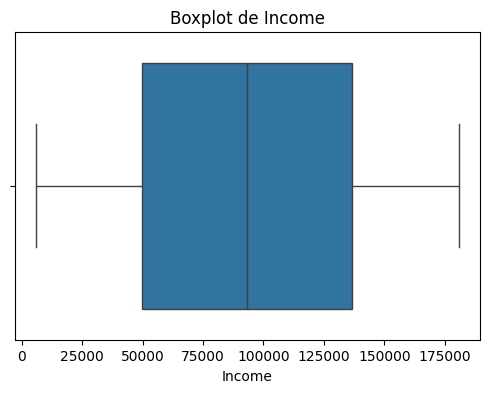

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





In [ ]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [ ]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
270,286,39.0,housemaid,MARRIED,basic.9y,0.0,1.0,0.0,telephone,935,...,1.1,"93,994","-36,4","4,857",5191,yes,1-agosto-2019,41.684,-114.471,f1d6ac6e-dcfb-4e32-96c6-2a77463f8a30
17325,17422,31.0,admin.,SINGLE,university.degree,0.0,0.0,0.0,cellular,173,...,1.4,"93,918","-42,7","4,962","5228,1",no,9-mayo-2015,38.701,-69.525,c9258e31-36ae-4720-82cb-a12b07f9d230
36162,36329,26.0,admin.,SINGLE,high.school,0.0,0.0,0.0,cellular,479,...,-2.9,"92,963","-40,8","1,262","5076,2",yes,15-febrero-2016,28.076,-78.296,ae34836a-bab6-4978-86cc-abb9a84762d5
10904,11001,38.0,blue-collar,MARRIED,basic.9y,0.0,0.0,0.0,telephone,359,...,1.4,"94,465","-41,8","4,962","5228,1",no,29-diciembre-2015,43.299,-93.363,9d016955-bd58-47f3-9388-0ce55449ac27
24064,24186,50.0,self-employed,MARRIED,university.degree,0.0,0.0,0.0,cellular,223,...,-0.1,"93,2",-42,"4,191","5195,8",no,11-julio-2018,33.057,-87.802,e48c8fb7-8abe-4667-aa8c-88137e5b0fa8
8598,8695,NaN,admin.,SINGLE,basic.9y,0.0,1.0,0.0,telephone,341,...,1.4,"94,465","-41,8",NaN,"5228,1",no,22-julio-2018,49.157,-94.770,7099a423-9d78-4a03-9471-18182e224902
9382,9479,NaN,blue-collar,MARRIED,basic.4y,0.0,0.0,0.0,telephone,86,...,1.4,"94,465","-41,8","4,961","5228,1",no,8-octubre-2018,25.931,-89.358,d08cdc2c-4731-41f5-b61a-b718a3445c70
34705,34849,28.0,services,SINGLE,high.school,0.0,1.0,1.0,cellular,9,...,-1.8,"92,893","-46,2",NaN,"5099,1",no,15-noviembre-2018,28.975,-120.166,92fdcf28-dc5f-4c2f-aa36-5cfa6ce19c3a
19850,19947,32.0,admin.,MARRIED,university.degree,0.0,1.0,0.0,cellular,79,...,1.4,"93,444","-36,1","4,966","5228,1",no,3-marzo-2018,26.663,-120.841,650c9762-7123-4778-829d-c923bf2407ce
37105,37272,36.0,management,MARRIED,university.degree,0.0,0.0,0.0,telephone,328,...,-2.9,"92,201","-31,4","0,884","5076,2",yes,23-noviembre-2015,45.713,-96.663,fbd6c61c-2aa4-4d40-885f-f292dec246cb


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

# Columnas e información ( Hay datos incompletos)

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos.

10. campaign (int64):  número de veces que se ha contactado al cliente.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó).

12. previous (int64): número de contactos anteriores.

13. poutcome (object): resultado de campaña de marketing anterior.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor.

16. cons.conf.idx (object): indice de confianza del consumidor.

17. euribor3m (object): tasa de interés euríbor a 3 meses.

18. nr.employed (object): número de empleados (indicador económico).

19. month (object): mes del último contacto de la campaña.

20. day_of_week (object): día de la semana del último contacto.

21. longitude (float64): localización geográfica.

22. id (object): identificador único del cliente.

23. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).


# * Pasos limpieza y transformación



Eliminar Unnamed: 0.

Revisar valores faltantes (default, housing, loan, marital, job).

Analizar la variable objetivo y (cuántos clientes aceptaron vs rechazaron)

Distribución de edad: ver segmentos más contactados.

Cruzar duración de llamadas (duration) con éxito (y).

Revisar variables económicas (euribor3m, emp.var.rate): ómo influyen en la respuesta.

Outliers en duración de llamadas y pdays.




